In [1]:
import numpy as np
from features_to_hdf5 import features_to_hdf5

Using gpu device 0: GeForce 940M (CNMeM is enabled with initial size: 80.0% of memory, cuDNN not available)
C:\toolkits\anaconda2-4.2.0\lib\site-packages\theano-0.8.2-py2.7.egg\theano\tensor\signal\downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")
C:\toolkits\anaconda2-4.2.0\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def label(f):
    if f.find('cat') == -1:
        return np.asarray([0])
    else:
        return np.asarray([1])

# Load pre-trained model from sklearn-theano

IT TAKES LONG TIME DOWNLOADING AND TRANSFORMING FILES.
- [OverfeatTransformer](http://sklearn-theano.github.io/modules/generated/sklearn_theano.feature_extraction.OverfeatTransformer.html)
- [Kaggle: Dogs vs. Cats dataset](https://www.kaggle.com/c/dogs-vs-cats/data)

In [3]:
features_to_hdf5('./train/*.jpg', './train/train.hdf5', label_callback=label)

Extracting features of a total of 25000 files...
25000/25000 [==============================] - 7391s   
Successfully transformed 25000 files
Cleaning up...
25000/25000 [==============================] - 70s    


In [4]:
features_to_hdf5('./test1/*.jpg', './test1/test.hdf5')

Extracting features of a total of 12500 files...
12500/12500 [==============================] - 3815s   
Successfully transformed 12500 files
Cleaning up...
12500/12500 [==============================] - 33s    


# Classifying features with Keras

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

import h5py

from keras.utils.io_utils import HDF5Matrix
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.callbacks import ModelCheckpoint

from scipy.misc import imread

Using Theano backend.


In [7]:
# training set
X = HDF5Matrix('./train/train.hdf5', 'features', start=0, end=20000)
y = HDF5Matrix('./train/train.hdf5', 'labels', start=0, end=20000)

# validation set
Xv = HDF5Matrix('./train/train.hdf5', 'features', start=20000, end=25000)
yv = HDF5Matrix('./train/train.hdf5', 'labels', start=20000, end=25000)

In [25]:
model = Sequential()

# 2 fully connectedly layers
model.add(Dense(100, input_dim=3072, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1, input_dim=100, activation='sigmoid'))

model.compile('adam', 'binary_crossentropy', class_mode='binary')

In [26]:
batch_size = 100
nb_epoch = 20

# save best model
checkpoint = ModelCheckpoint('best_method.hdf5', monitor='val_acc', save_best_only=True, verbose=1)

In [27]:
# shuffle='batch' is required when using HDF5Matrix
model.fit(X, y, batch_size=batch_size, nb_epoch=nb_epoch, show_accuracy=True, verbose=2,
          validation_data=[Xv, yv], callbacks=[checkpoint], shuffle='batch')

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
1s - loss: 0.1309 - acc: 0.9478 - val_loss: 0.0977 - val_acc: 0.9606
Epoch 00000: val_acc improved from -inf to 0.96060, saving model to best_method.hdf5
Epoch 2/20
1s - loss: 0.0703 - acc: 0.9735 - val_loss: 0.0984 - val_acc: 0.9592
Epoch 00001: val_acc did not improve
Epoch 3/20
2s - loss: 0.0499 - acc: 0.9822 - val_loss: 0.1007 - val_acc: 0.9586
Epoch 00002: val_acc did not improve
Epoch 4/20
1s - loss: 0.0326 - acc: 0.9896 - val_loss: 0.1123 - val_acc: 0.9614
Epoch 00003: val_acc improved from 0.96060 to 0.96140, saving model to best_method.hdf5
Epoch 5/20
1s - loss: 0.0237 - acc: 0.9926 - val_loss: 0.1241 - val_acc: 0.9580
Epoch 00004: val_acc did not improve
Epoch 6/20
1s - loss: 0.0169 - acc: 0.9951 - val_loss: 0.1295 - val_acc: 0.9574
Epoch 00005: val_acc did not improve
Epoch 7/20
2s - loss: 0.0149 - acc: 0.9959 - val_loss: 0.1313 - val_acc: 0.9572
Epoch 00006: val_acc did not improve
Epoch 8/20
1s - loss: 0.0098 - ac

In [36]:
# load the best method from previous iterations

model.load_weights('best_method.hdf5')

C:\toolkits\anaconda2-4.2.0\lib\site-packages\ipykernel\__main__.py:11: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


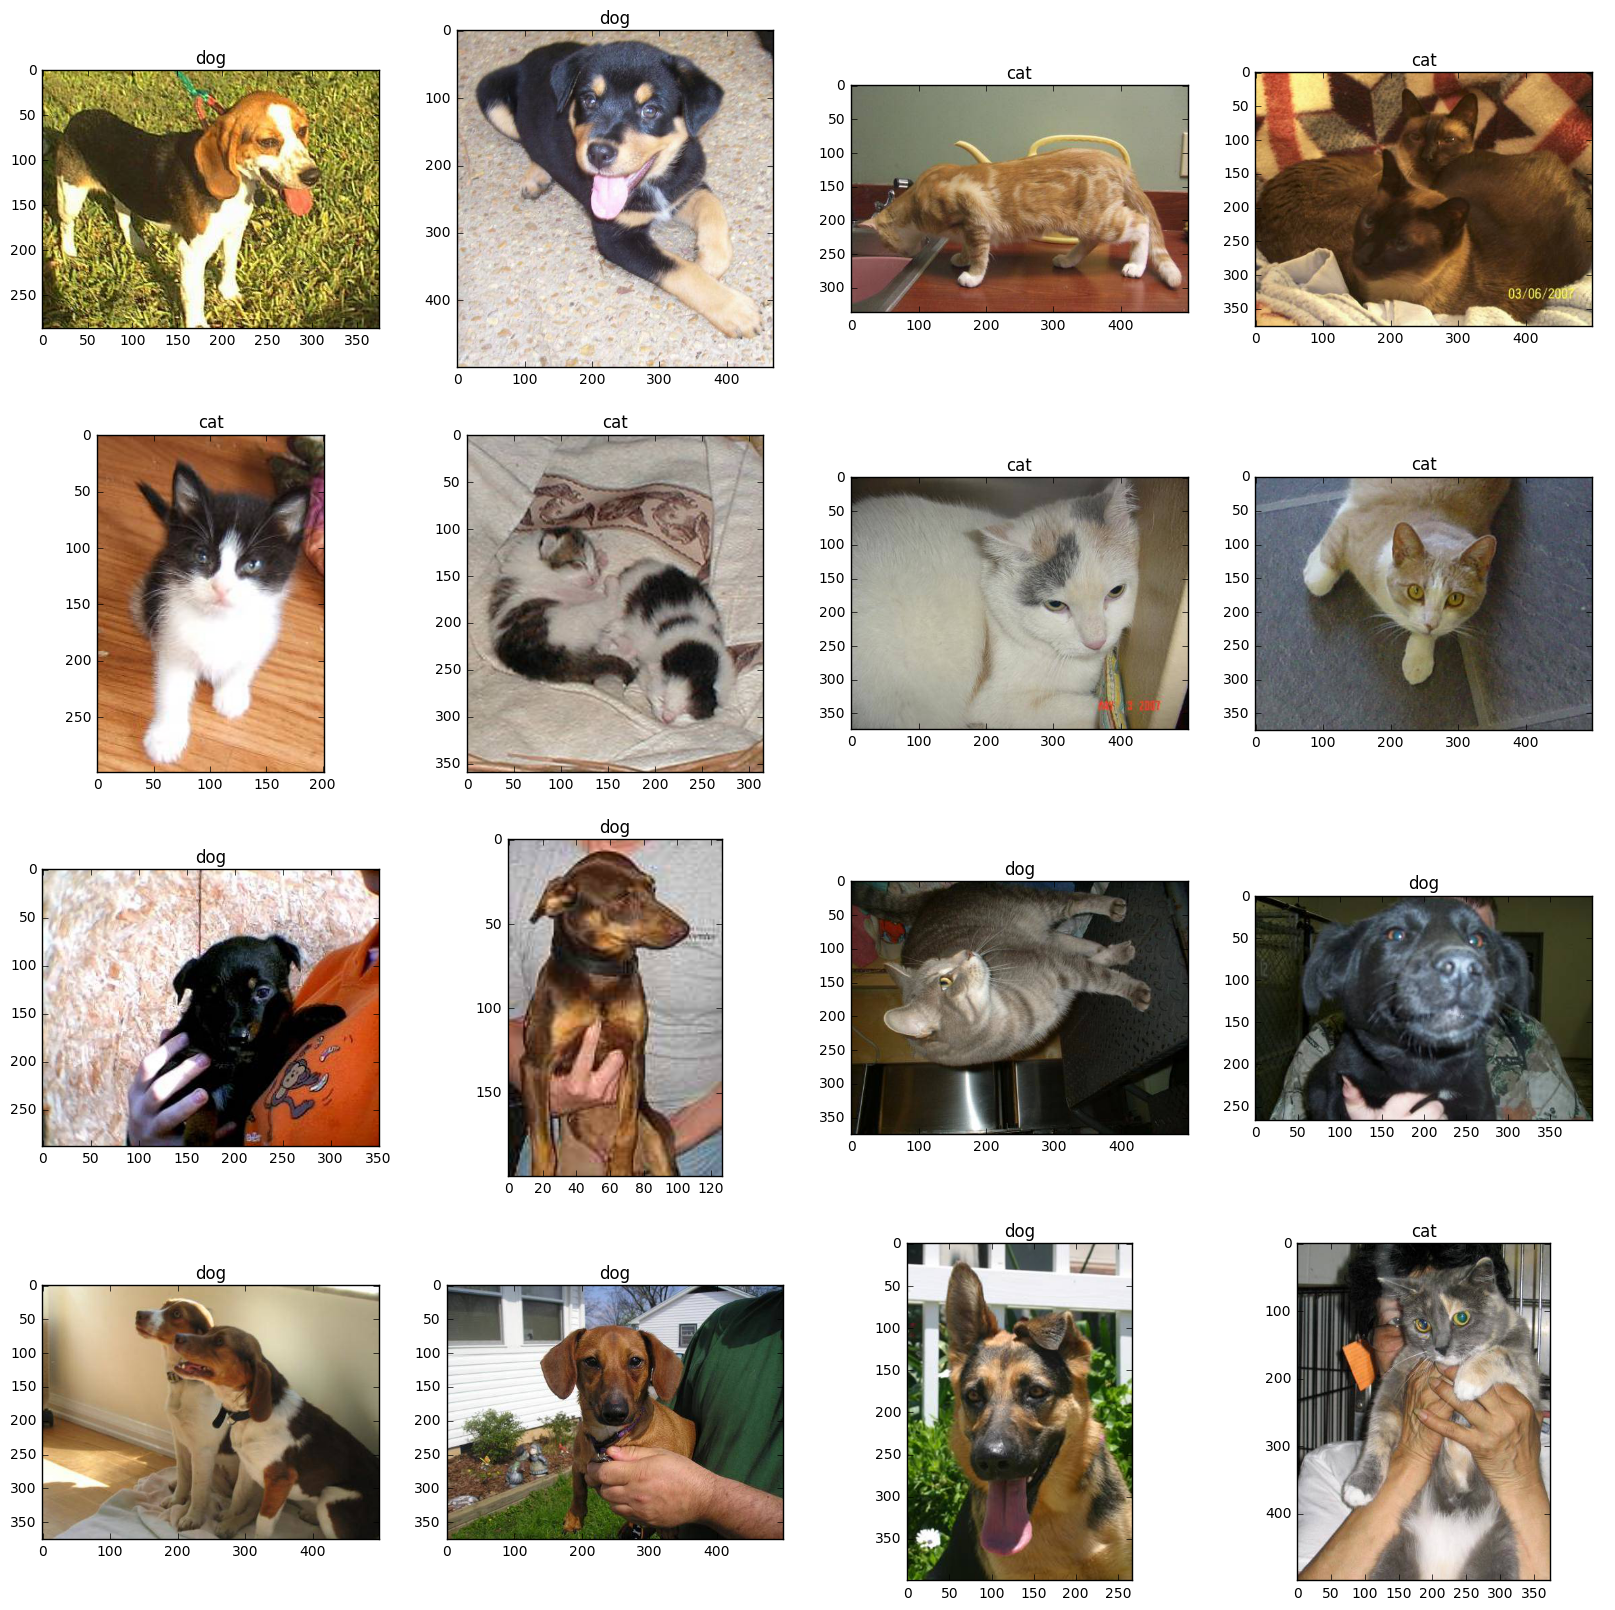

In [37]:
label = ['dog', 'cat']
# Xt = h5py.File('./test1/test.hdf5', 'r')

plt.figure(figsize=[20,20])
with h5py.File('./test1/test.hdf5', 'r') as h5:
    Xt = h5['features']
    with open('./test1/test.hdf5.txt') as files:
        for i, f in enumerate(files):
            img = imread(f[:-1])
            predicted = model.predict_classes(Xt[i:i + 1], verbose=0)[0]
            pet = label[predicted]

            plt.subplot(4,4,i+1)
            plt.imshow(img)
            plt.title(pet)
            if i == 15: 
                break

## My photos (Thank my friends and their cute pets!!)

In [42]:
features_to_hdf5('./my_sample/*.jpg', './my_sample/sample.hdf5')

Extracting features of a total of 25 files...
Successfully transformed 25 files
Cleaning up...
25/25 [==============================] - 0s     


C:\toolkits\anaconda2-4.2.0\lib\site-packages\ipykernel\__main__.py:10: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


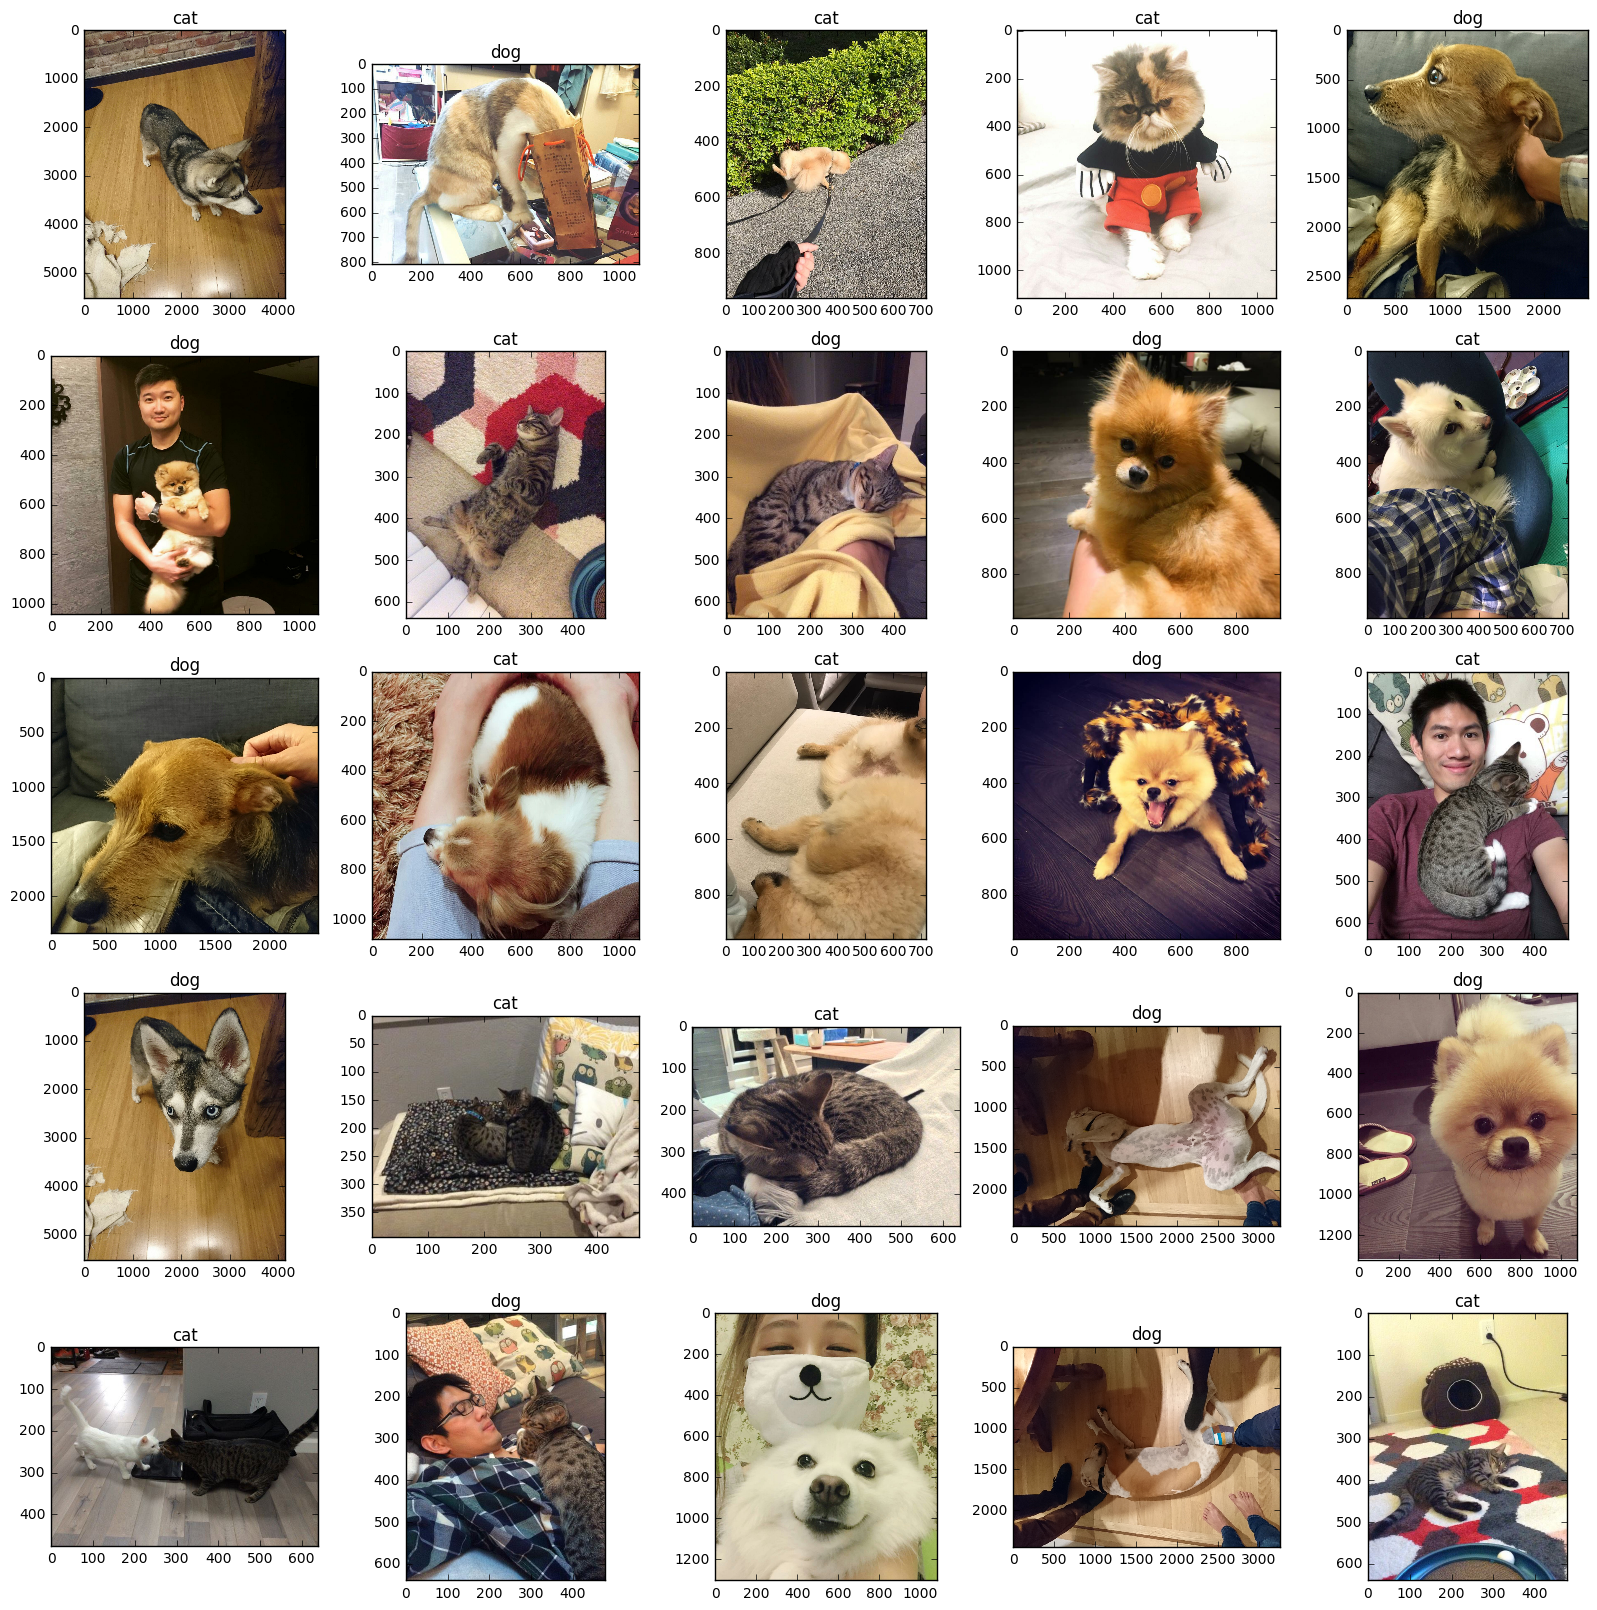

In [44]:
##### label = ['dog', 'cat']

plt.figure(figsize=[20,20])
with h5py.File('./my_sample/sample.hdf5', 'r') as h5:
    Xt = h5['features']
    with open('./my_sample/sample.hdf5.txt') as files:
        for i, f in enumerate(files):
            img = imread(f[:-1])
            predicted = model.predict_classes(Xt[i:i + 1], verbose=0)[0]
            pet = label[predicted]

            plt.subplot(5,5,i+1)
            plt.imshow(img)
            plt.title(pet)
